## Haberman Dataset.

**Objective**: To classify patients who survived and did not survive based on their age, the no. of positive nodes they had and the year in which the operation was conducted.

In [1]:
#Importing all the necessary libraries

#Libraries for numerical data processing
import pandas as pd
import numpy as np

#Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing warning library for ignoring warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
haberman = pd.read_csv('haberman.csv')

## High level statistics of the dataset

In [3]:
haberman.shape

(306, 4)

This tells us that there are **306 rows and 4 columns** in the haberman dataset

In [4]:
#.info() gives us a little more information about the dataset than shape.

haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**Observations:** 
1. The dataset contains **4 columns**
2. It consists **306 rows**
3. All the **four columns** have **only integer values.**
4. The dataset **does not contain any null values.**

In [5]:
#Using the .head() method to get the first 5 values.
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Obervations**:
- Age column represents the age of the patient at the time of surgery.
- Year represents the year in which the operation was performed on the patient.

- The status column represents the status of patient. 
   
   1-> Patient passed away after surgery.
   2-> Patient survived the surgery.


In [6]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:**
1. From above, we can see the mean of age is 52 and mean for positive nodes found its 4.
2. The minimum age is 30, while the maximum age is 83.
3. Also, minimum number of +ve nodes found is 0, while the maximum is 52 +ve nodes.

In [7]:
#As the dataset contains numerical values in the status column. Converting those to proper labels.

haberman['status'].replace(1, 'Did_Not_Survive', inplace=True)
haberman['status'].replace(2, 'Survived', inplace=True)
haberman.head()

,age,year,nodes,status
0,30,64,1,Did_Not_Survive
1,30,62,3,Did_Not_Survive
2,30,65,0,Did_Not_Survive
3,31,59,2,Did_Not_Survive
4,31,65,4,Did_Not_Survive


In [8]:
#Dtype of status is showing as object which is false as it should be category.
haberman.dtypes

age        int64
year       int64
nodes      int64
status    object
dtype: object

In [9]:
haberman['status'] = haberman['status'].astype('category')
haberman.dtypes

age          int64
year         int64
nodes        int64
status    category
dtype: object

In [10]:
#This gives us a count of people who survived and people who did not. Also, the target column is severely imbalanced.

#normalize=True gives the frequencies of values.
haberman['status'].value_counts(normalize=True)

Did_Not_Survive    0.735294
Survived           0.264706
Name: status, dtype: float64

**Observation:**
1. We can say that about **74% patients did not survive** while **26% of patients survived.**

## Performing Univariate Analysis
### 1. Probability Density Function:

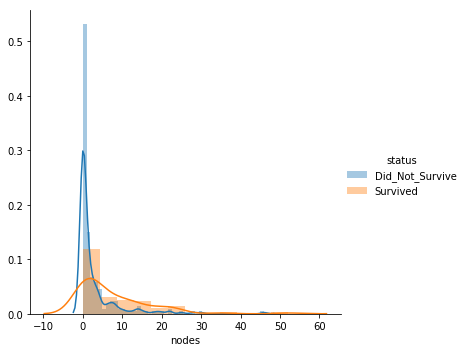

In [11]:
sns.FacetGrid(haberman, hue="status", size=5).map(sns.distplot, "nodes").add_legend()
plt.show()

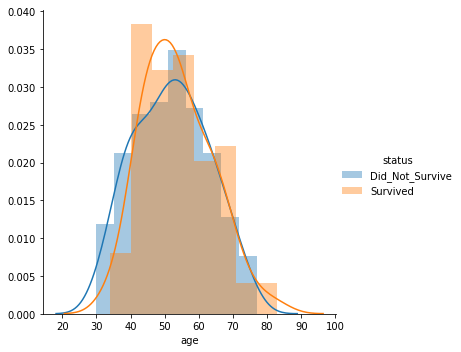

In [12]:
sns.FacetGrid(haberman, hue="status", size=5).map(sns.distplot, "age").add_legend()
plt.show()

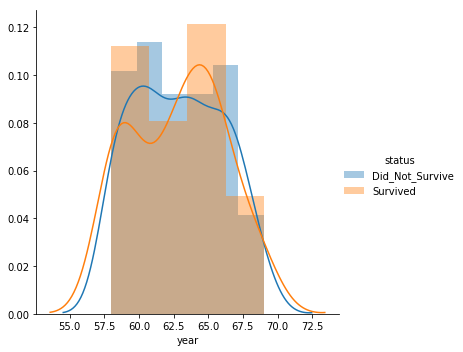

In [13]:
sns.FacetGrid(haberman, hue="status", size=5).map(sns.distplot, "year").add_legend()
plt.show()

**Observations:**
- **Alot of patients who survived had positive nodes in the range 0-5**. As we can see above that the PDF (where node is the varaible) is very dense in the space 0 to 5.
- We can say that after plotting PDF using age as a variable, **most patients who survived were aged between 40-50.**
- Also, most patients who were **between the age of 50-60, did not survive.** 
- We can say after looking at the above PDF using year as a variable, that **alot of patients did not survive in the years between 1960-1961. (approximately).**
- We can also say that **most patients survived during the year 65.** (approximately).

### 2. Boxplot:

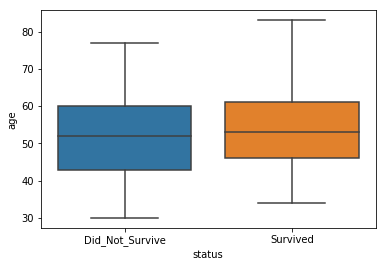

In [14]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

**Observations:**
- We can see from the above boxplot that the 25th, 50th and 75th percentile value of people who did not survive are approximately 42, 51 and 60 respectively.
- The people who survived had a **median of age greater than the people who did not**, as it is clearly visible that the **50th percentile value of people who survived is slightly higher than people who did not.**

### 3. Violin Plot:

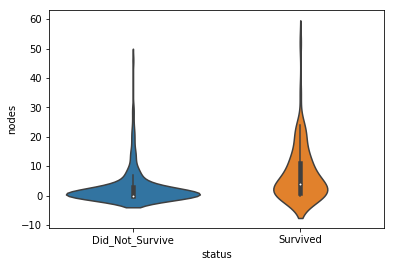

In [15]:
sns.violinplot(x="status", y="nodes", data=haberman, size=15)
plt.show()

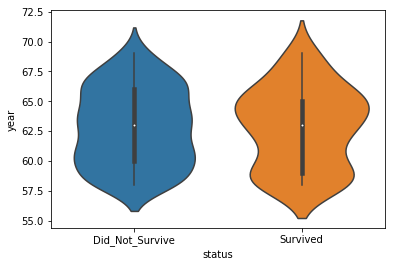

In [16]:
sns.violinplot(x="status", y="year", data=haberman, size=15)
plt.show()

**Observations:** 
- Alot of people who survived had number of positive nodes between 0-5 (Since the region 0-5 is a little fatter)
- Around 1960, most patients did not survive, whereas **around 1965 alot of patients survived.**

## Performing Bi-variate Analysis
### 1. Scatter-plot

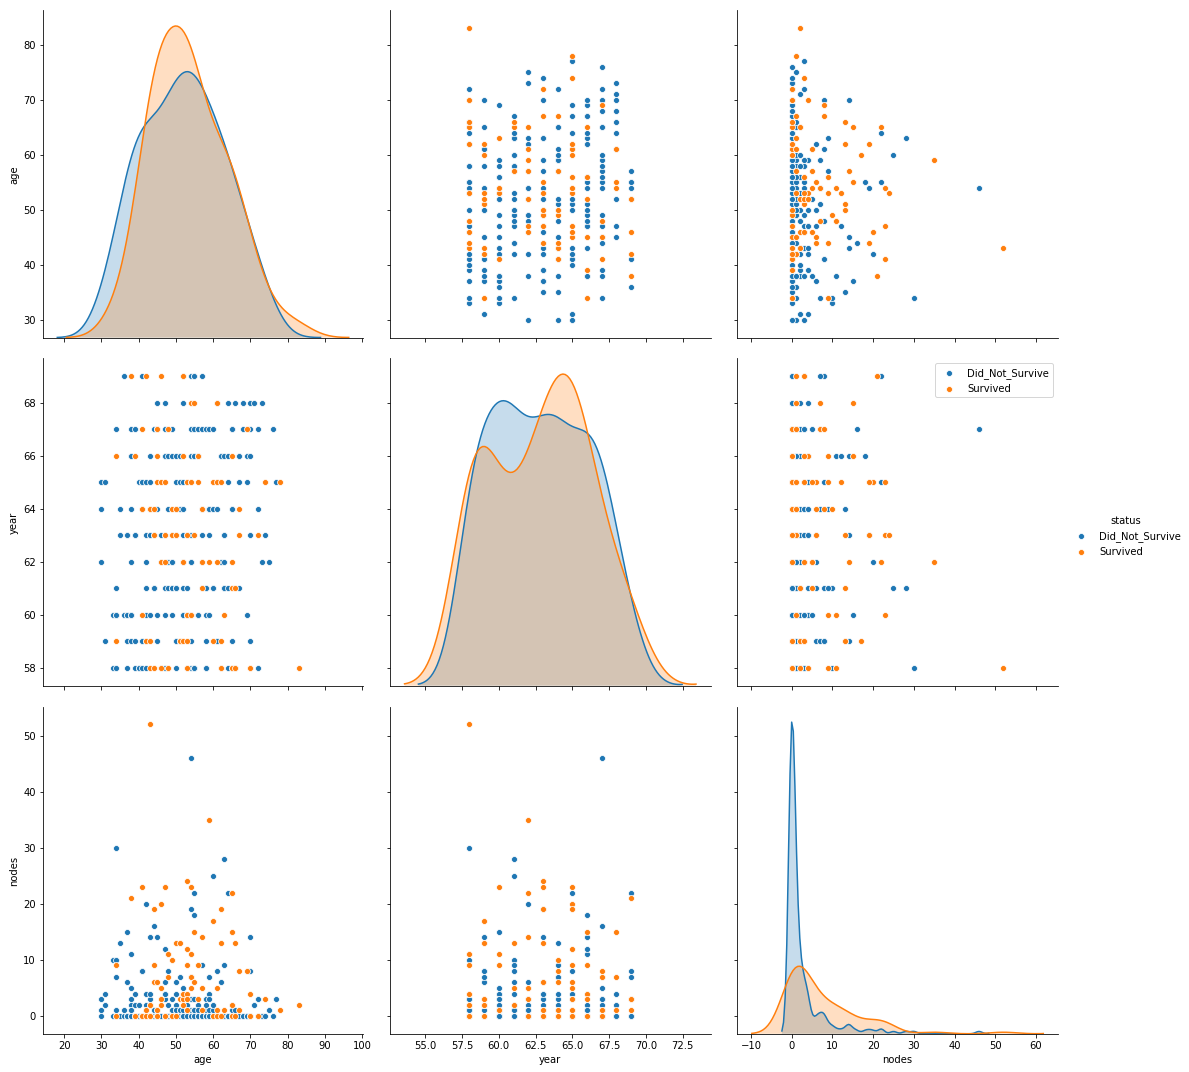

In [17]:
sns.pairplot(haberman, hue="status", size=5)
plt.legend()
plt.show()

**Observations**:

- When you compare scatter plot of age with nodes, we can see that as the no. of positive nodes are increased, people survived. 

***NOTE: The person who had the most number of postive nodes( 50+ ) survived!***

- And when patients had nodes less than 5, majority of them did not survive. (Since you can see alot of blue around 0, but more orange as the number of positive nodes are increased)

___

## Some additional Plots for Visualization
### 1. Count Plot

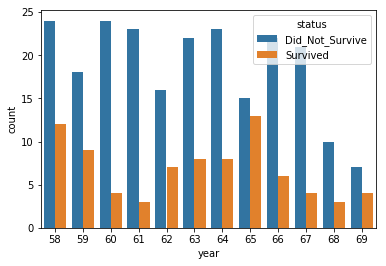

In [18]:
sns.countplot(x=haberman['year'], hue=haberman['status'], data=haberman)

### 2. Point Plot

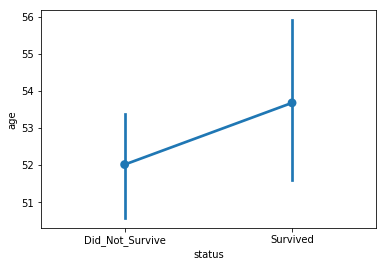

In [19]:
sns.pointplot(x=haberman['status'], y=haberman['age'], data=haberman)

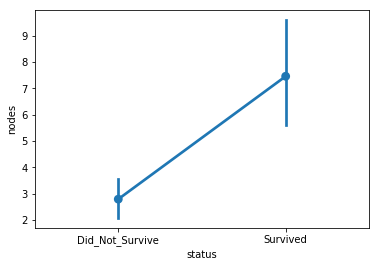

In [20]:
sns.pointplot(x=haberman['status'], y=haberman['nodes'], data=haberman)

**Observations:**

**Count Plot**
- In count plot we can see that **most people survived in the year 1965** (As previously stated above in violinplot)
- After 1961, a **steady grow can be seen in the number of people surviving (til 65).**

**Point Plot**
- By using point plot we can see that the **mean age of people who survived are greater than mean age of patients who did not.**
- Patients who had more number of positive nodes survived than those who had less number of positive nodes.

# Conclusion:
- After visualizing the haberman dataset, we can say that the survival of patients did not depend on the number of positive nodes they had, as we can clearly see that patients with more number of nodes survived than those who had lesser number of positive nodes.
- There was no year where patients survived more than the patients who did not (See count plot).
- Also, survival did not depend on age, as even the most youngest in the dataset (30), did not survive whereas the most aged (83) survived.